# 囚人のジレンマの進化シミュレーション

対応する動画：[【研究で使うPython】#7 囚人のジレンマゲームの進化シミュレーション](https://youtu.be/lZ2VdlVgRro)

動画のプレイリスト：[研究で使うPython](https://www.youtube.com/playlist?list=PLw5AEs-T7pLHxLaNvGD9tnhrDxAgH-QIw)

<IPython.core.display.Javascript object>


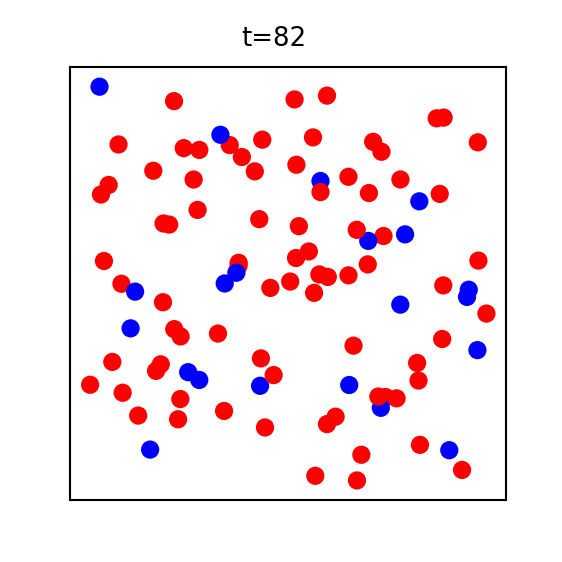

50
49
48
48
48
48
48
47
47
46
46
46
45
44
44
44
43
42
41
41
41
41
40
39
38
38
37
37
37
36
36
36
35
35
34
33
33
33
33
32
32
32
32
31
30
30
30
29
29
29
29
28
28
27
26
26
26
25
25
25
25
25
25
24
23
23
22
22
22
22
22
22
22
22
22
22
21
21
21
21
21
21
21
21
20
20
19
19
19
19
19
18
17
17
16
16
16
16
15
15


In [4]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 利得表
payoff = {'T':5, 'R':3, 'P':1, 'S':0}

# エージェント数
N = 100

fig=plt.figure(figsize=(3, 3))

# 画像データをストックするためのリスト
ims = []

# Agentクラス
class Agent:
    def __init__(self):
        self.strategy = np.random.choice(['C', 'D'])
        self.payoff = 0
        self.x = np.random.random()
        self.y = np.random.random()
        
    def updateStrategy(self, opponent):
        if self.payoff < opponent.payoff:
            self.strategy = opponent.strategy
        
    def resetPayoff(self):
        self.payoff = 0
        
agentList = [Agent() for i in range(N)]

for i in range(100):
    # 2人のエージェントをランダムに選ぶ
    randomTwoAgents = np.random.choice(agentList, 2, replace=False)

    # 囚人のジレンマゲームを実行
    if randomTwoAgents[0].strategy == 'C' and randomTwoAgents[1].strategy == 'C':
        randomTwoAgents[0].payoff += payoff['R']
        randomTwoAgents[1].payoff += payoff['R']
    elif randomTwoAgents[0].strategy == 'C' and randomTwoAgents[1].strategy == 'D':
        randomTwoAgents[0].payoff += payoff['S']
        randomTwoAgents[1].payoff += payoff['T']
    elif randomTwoAgents[0].strategy == 'D' and randomTwoAgents[1].strategy == 'C':
        randomTwoAgents[0].payoff += payoff['T']
        randomTwoAgents[1].payoff += payoff['S']
    else:
        randomTwoAgents[0].payoff += payoff['P']
        randomTwoAgents[1].payoff += payoff['P']

    # 2人のエージェントの戦略を更新
    randomTwoAgents[0].updateStrategy(randomTwoAgents[1])
    randomTwoAgents[1].updateStrategy(randomTwoAgents[0])

    # 利得を0にリセット
    randomTwoAgents[0].resetPayoff()
    randomTwoAgents[1].resetPayoff()
    
    xList = [agent.x for agent in agentList]
    yList = [agent.y for agent in agentList]
    colList = ['blue' if agent.strategy == 'C' else 'red' for agent in agentList]
    
    strategyList =  [agent.strategy for agent in agentList]
    print(strategyList.count('C'))
    
    im = plt.scatter(xList, yList, c=colList)
    title = plt.text(0.4, 1.1, f't={i}')
    ims.append([im, title])

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
    
ani = animation.ArtistAnimation(fig, ims)
plt.show()

<IPython.core.display.Javascript object>


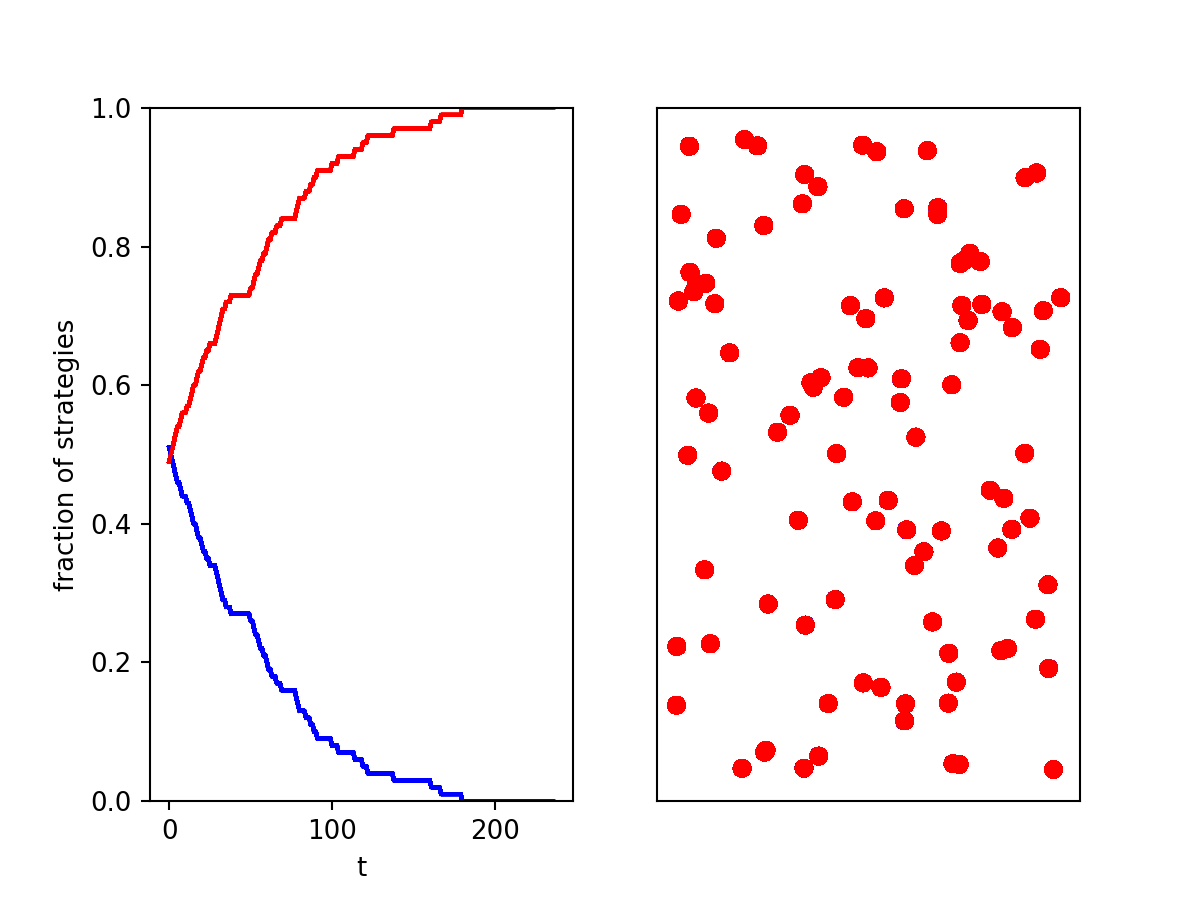

In [5]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 利得表
payoff = {'T':5, 'R':3, 'P':1, 'S':0}

# エージェント数
N = 100

fig=plt.figure()
ax1 = fig.add_subplot(121, xlabel='t', ylabel='fraction of strategies', ylim=(0,1))
ax2 = fig.add_subplot(122)

# Agentクラス
class Agent:
    def __init__(self):
        self.strategy = np.random.choice(['C', 'D'])
        self.payoff = 0
        self.x = np.random.random()
        self.y = np.random.random()
        
    def updateStrategy(self, opponent):
        if self.payoff < opponent.payoff:
            self.strategy = opponent.strategy
        
    def resetPayoff(self):
        self.payoff = 0
        
agentList = [Agent() for i in range(N)]
tList = []
cList = []
dList = []

def update(frame):
    # 2人のエージェントをランダムに選ぶ
    randomTwoAgents = np.random.choice(agentList, 2, replace=False)

    # 囚人のジレンマゲームを実行
    if randomTwoAgents[0].strategy == 'C' and randomTwoAgents[1].strategy == 'C':
        randomTwoAgents[0].payoff += payoff['R']
        randomTwoAgents[1].payoff += payoff['R']
    elif randomTwoAgents[0].strategy == 'C' and randomTwoAgents[1].strategy == 'D':
        randomTwoAgents[0].payoff += payoff['S']
        randomTwoAgents[1].payoff += payoff['T']
    elif randomTwoAgents[0].strategy == 'D' and randomTwoAgents[1].strategy == 'C':
        randomTwoAgents[0].payoff += payoff['T']
        randomTwoAgents[1].payoff += payoff['S']
    else:
        randomTwoAgents[0].payoff += payoff['P']
        randomTwoAgents[1].payoff += payoff['P']

    # 2人のエージェントの戦略を更新
    randomTwoAgents[0].updateStrategy(randomTwoAgents[1])
    randomTwoAgents[1].updateStrategy(randomTwoAgents[0])

    # 利得を0にリセット
    randomTwoAgents[0].resetPayoff()
    randomTwoAgents[1].resetPayoff()

    xList = [agent.x for agent in agentList]
    yList = [agent.y for agent in agentList]
    colList = ['blue' if agent.strategy == 'C' else 'red' for agent in agentList]
    
    strategyList =  [agent.strategy for agent in agentList]
    tList.append(frame)
    cList.append(strategyList.count('C')/len(strategyList))
    dList.append(strategyList.count('D')/len(strategyList))
    ax1.plot(tList, cList, 'b')
    ax1.plot(tList, dList, 'r')

    
    ax2.scatter(xList, yList, c=colList)
        
ax2.axes.xaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)

ani = animation.FuncAnimation(fig, update, frames = range(1000))
plt.show()